In [1]:
import pandas as pd

df = pd.read_csv("D:/project/ml_project/notebook/approval/loan_approval_dataset.csv")

In [2]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
loan_status                  0
dtype: int64

In [4]:
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [6]:
df[' loan_status']= df[' loan_status'].map({' Rejected': 0, ' Approved': 1})
df[' education']= df[' education'].map({' Not Graduate': 0, ' Graduate': 1})
df[' self_employed']= df[' self_employed'].map({' No': 0, ' Yes': 1})

df.to_csv("D:/project/ml_project/notebook/approval/loan_approval_dataset.csv")

In [9]:
df.dtypes

loan_id                      int64
 no_of_dependents            int64
 education                   int64
 self_employed               int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
loan_status                  int64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

In [8]:
x = df.drop([" loan_status"],axis=1)
y = df[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       549
           1       0.94      0.98      0.96       305

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854

Accuracy of Random Forest is is :  97.30679156908664


Text(0.5, 1.0, 'Confusion matrix: Random Forest')

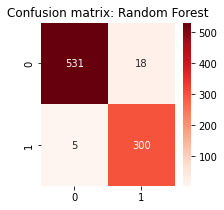

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

# Creating confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test, rfpred), annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix: Random Forest')